In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session= Session(engine)

In [9]:
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a99a388608>,
 'id': 0,
 'tobs': 18.3,
 'prcp': 2.0,
 'station': 'USC00519397',
 'date': '2010-01-01'}

In [10]:
first_row_station= session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a99a39c708>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 0.914,
 'longitude': -157.8168,
 'id': 0,
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [12]:
# Calculate the date one year from the last date in data set.
year_ago= dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [13]:
# Perform a query to retrieve the data and precipitation scores
new_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23', Measurement.date <= '2017-08-23').all()
for measurement in new_data:
    print("Date:", measurement.date, "Precipitation:", measurement.prcp)


Date: 2016-08-23 Precipitation: 0.0
Date: 2016-08-24 Precipitation: 2.0
Date: 2016-08-25 Precipitation: 2.0
Date: 2016-08-26 Precipitation: 0.0
Date: 2016-08-27 Precipitation: 0.0
Date: 2016-08-28 Precipitation: 0.3
Date: 2016-08-29 Precipitation: 0.0
Date: 2016-08-30 Precipitation: 0.0
Date: 2016-08-31 Precipitation: 3.3
Date: 2016-09-01 Precipitation: 0.0
Date: 2016-09-02 Precipitation: 0.0
Date: 2016-09-03 Precipitation: 0.0
Date: 2016-09-04 Precipitation: 0.8
Date: 2016-09-05 Precipitation: None
Date: 2016-09-06 Precipitation: None
Date: 2016-09-07 Precipitation: 1.3
Date: 2016-09-08 Precipitation: 0.0
Date: 2016-09-09 Precipitation: 0.8
Date: 2016-09-10 Precipitation: 0.0
Date: 2016-09-11 Precipitation: 1.3
Date: 2016-09-12 Precipitation: 0.0
Date: 2016-09-13 Precipitation: 0.5
Date: 2016-09-14 Precipitation: 33.5
Date: 2016-09-15 Precipitation: 10.7
Date: 2016-09-16 Precipitation: 1.5
Date: 2016-09-17 Precipitation: 1.3
Date: 2016-09-18 Precipitation: 0.0
Date: 2016-09-19 Precipi

In [14]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
new_data_df = pd.DataFrame(new_data, columns=['date', 'precipitation'])
new_data_df

,date,precipitation
0,2016-08-23,0.0
1,2016-08-24,2.0
2,2016-08-25,2.0
3,2016-08-26,0.0
4,2016-08-27,0.0
...,...,...
2225,2017-08-19,2.3
2226,2017-08-20,NaN
2227,2017-08-21,14.2
2228,2017-08-22,12.7


In [15]:
# Sort the dataframe by date
new_data_df = new_data_df.sort_values(by='date', ascending=True)
new_data_df


,date,precipitation
0,2016-08-23,0.0
1009,2016-08-23,NaN
1529,2016-08-23,45.5
704,2016-08-23,1.3
361,2016-08-23,3.8
...,...,...
1527,2017-08-22,0.0
1008,2017-08-23,0.0
360,2017-08-23,0.0
1528,2017-08-23,2.0


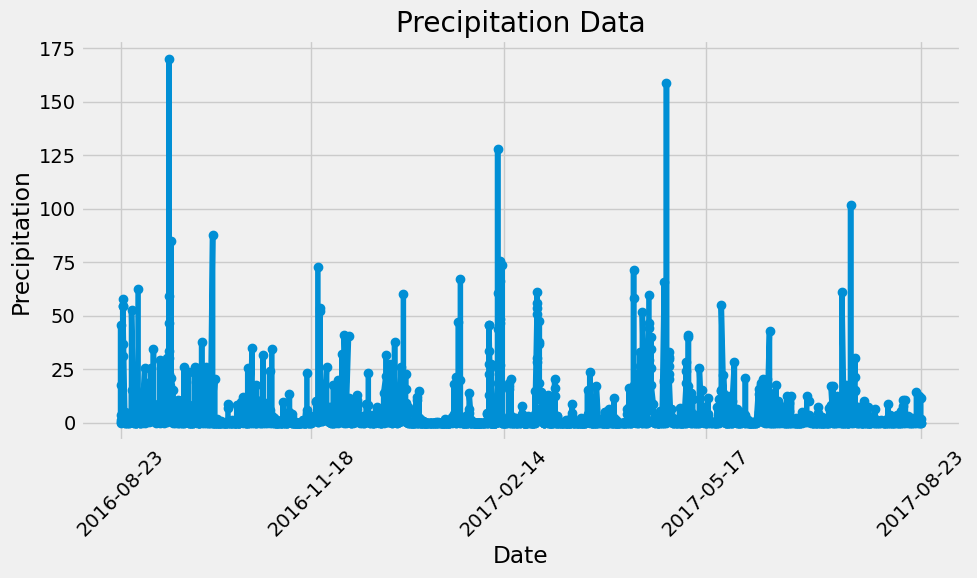

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
x_values = new_data_df['date'][::(len(new_data_df['date']) - 1) // 4]
plt.figure(figsize=(10, 6))
plt.plot(new_data_df['date'], new_data_df['precipitation'], marker='o')
plt.title('Precipitation Data')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.xticks(x_values,rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
new_data_df.describe()


,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
number_of_stations = session.query(Station.name).count()
number_of_stations

9

In [19]:
list_of_stations = session.query(Station.station,Station.name).all()
list_of_stations

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [20]:
list_station_with_prcp = session.query(Measurement.station,func.sum(Measurement.prcp)).group_by(Measurement.station).all()

list_station_with_prcp

[('USC00511918', 2362.099999999996),
 ('USC00513117', 9728.700000000037),
 ('USC00514830', 5962.8000000000475),
 ('USC00516128', 27136.69999999987),
 ('USC00517948', 1104.0999999999985),
 ('USC00518838', 1801.6999999999964),
 ('USC00519281', 14962.19999999989),
 ('USC00519397', 3354.4000000000215),
 ('USC00519523', 7518.500000000056)]

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).all()
active_station

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [22]:
active_station_df = pd.DataFrame(active_station,columns=['station','number_observations']).sort_values('number_observations',ascending=True)
active_station_df


,station,number_observations
5,USC00518838,511
4,USC00517948,1372
0,USC00511918,1979
2,USC00514830,2202
3,USC00516128,2612
8,USC00519523,2669
1,USC00513117,2709
7,USC00519397,2724
6,USC00519281,2772


In [23]:
most_active_station = active_station_df.iloc[-1]
print(f"The most active station is: {most_active_station}")

The most active station is: station                USC00519281
number_observations           2772
Name: 6, dtype: object


In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp=session.query(Measurement.station,func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
lowest_temp

[('USC00519281', 12.2)]

In [25]:
highest_temp=session.query(Measurement.station,func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
highest_temp

[('USC00519281', 29.4)]

In [26]:
average_temp=session.query(Measurement.station,func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
average_temp

[('USC00519281', 22.03582251082252)]

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station=='USC00519281').filter(Measurement.date >= '2016-08-23', Measurement.date <= '2017-08-23').all()
temp_df = pd.DataFrame(temp,columns=['date','temperature']).sort_values('date',ascending=True)
temp_df['city']='Waihee'
temp_df
csv_path = 'most_active_station.csv'

# Save the DataFrame as a CSV file
temp_df.to_csv(csv_path, index=False)


In [28]:
temp_df.sort_values('temperature',ascending=True)

,date,temperature,city
163,2017-02-02,15.0,Waihee
169,2017-02-08,15.0,Waihee
170,2017-02-09,15.0,Waihee
250,2017-04-30,15.6,Waihee
164,2017-02-03,15.6,Waihee
...,...,...,...
200,2017-03-11,27.2,Waihee
340,2017-07-29,27.8,Waihee
334,2017-07-23,27.8,Waihee
344,2017-08-05,27.8,Waihee


In [29]:
labels=['15.0-16.1','16.1-17.2','17.2-18.3','18.3-19.4','19.4-20.5','20.5-21.6',
        '21.6-22.8','22.8-24.0','24.0-25.1','25.1-26.2','26.2-27.3','27.3-28.4']
bins = [15.0, 16.1, 17.2, 18.3, 19.4, 20.5, 21.6, 22.8, 24.0, 25.1, 26.2, 27.3, 28.4]

In [30]:
temp_df['temperature_range'] = pd.cut(temp_df['temperature'], bins=bins, labels=labels, right=False)

temp_df


,date,temperature,city,temperature_range
0,2016-08-23,25.0,Waihee,24.0-25.1
1,2016-08-24,25.0,Waihee,24.0-25.1
2,2016-08-25,26.7,Waihee,26.2-27.3
3,2016-08-26,26.7,Waihee,26.2-27.3
4,2016-08-27,23.9,Waihee,22.8-24.0
...,...,...,...,...
347,2017-08-14,25.0,Waihee,24.0-25.1
348,2017-08-15,25.0,Waihee,24.0-25.1
349,2017-08-16,24.4,Waihee,24.0-25.1
350,2017-08-17,24.4,Waihee,24.0-25.1


In [31]:
frequency = temp_df['temperature_range'].groupby(temp_df['temperature_range']).count()
frequency

temperature_range
15.0-16.1     5
16.1-17.2     7
17.2-18.3     7
18.3-19.4    12
19.4-20.5    27
20.5-21.6    41
21.6-22.8    40
22.8-24.0    90
24.0-25.1    64
25.1-26.2    40
26.2-27.3    15
27.3-28.4     4
Name: temperature_range, dtype: int64

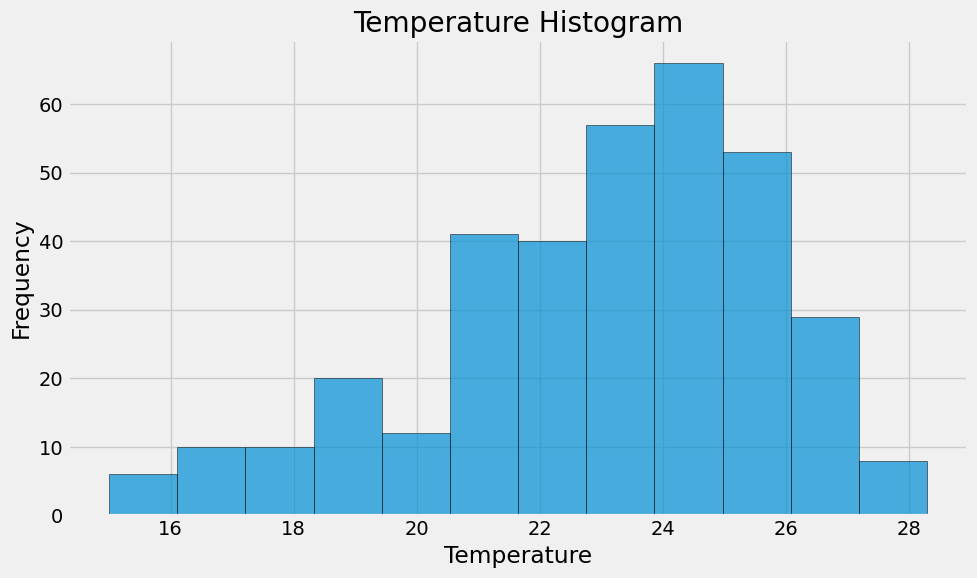

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(temp_df['temperature'], bins=12, edgecolor='black', alpha=0.7)
plt.title('Temperature Histogram')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()







# Close Session

In [33]:
# Close Session
session.close()